## Pattern Recognition
### Assignment 2  
#### Group 4:

- COE18B056 - Thigulla Vamsi Krishna
- COE18B065 - Srinivasan R Sharma
- CED18I039 - Paleti Krishnasai

Use only two features: Petal Length and Petal Width, for 3 class classification and draw the decision boundary between them (2 dimension, 3 regions also called as multi-class problem)

#### Approach:

Based on the functions used in Q1,Q2,Q3 we can find the decision boundaries between any 2 classes, this is done for each set of classes of the flowers.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sympy import *
from sklearn import datasets  #Sklearn is used only to import dataset

In [2]:
#Place data within Pandas Data Frame
iris = datasets.load_iris()
df =pd.DataFrame(iris['data'],columns=iris['feature_names'])
df['class']=iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
Class1 = df.loc[df['class']==0,['petal length (cm)','petal width (cm)']].values
Class2 = df.loc[df['class']==1,['petal length (cm)','petal width (cm)']].values
Class3 = df.loc[df['class']==2,['petal length (cm)','petal width (cm)']].values
Pw = 50/150

In [4]:
def cov_inv(w):
    """
    Takes the set of vectors in a class and returns the covariance matrix and inverse of the covariance matrix
    """
    w_cov=np.cov(w.transpose())
    return w_cov,np.linalg.inv(w_cov)
def get_mean(w):
    return np.mean(w,axis=0)
def get_X():
    """
    This function returns a set of coordinates denoted by X, used in the equation to calculate N(mean,sig)
    """
    x,y=symbols('x y')
    X=np.array([x,y]).transpose()
    return x,y,X
def get_equation(X,w_mean,w_cov,w_inv,pw):
    """
    Returns the value of gi(x) for some vector X, class wi and probability P(wi)
    """
    c1=-0.5*(np.dot(np.subtract(X,w_mean).transpose(),np.dot(w_inv,np.subtract(X,w_mean))))
    c2=-(w_cov.shape[0]/2)*np.log(2*np.pi)
    c3=-0.5*np.log(np.linalg.det(w_cov))
    c4=np.log(pw)
    return c1+c2+c3+c4

def move_sympyplot_to_axes(p, ax):
    """
    This function is used to set the parameters for a plot i.e. the axes, parent plot etc
    """
    backend = p.backend(p)
    backend.ax = ax
    backend._process_series(backend.parent._series, ax, backend.parent)
    backend.ax.spines['right'].set_color('none')
    backend.ax.spines['bottom'].set_position('zero')
    backend.ax.spines['top'].set_color('none')
    plt.close(backend.fig)
    
def plot(w1,w2,g,x,y,color):
    """
    Plot the points and the decision boundary of the classes w1,w2
    sympy.plot_implicit is used to plot the decision boundary and then pyplot is used to plot the classes on that implicit plot
    """
    p1 = plot_implicit(g, (x, -20, 20), (y, -20, 20), show=False,line_color = color)
    move_sympyplot_to_axes(p1, ax)
    plt.setp(ax.yaxis.get_label(), rotation=0)

In [5]:
def get_result(w1,w2,pw1,pw2,color):
    w1_cov,w1_inv=cov_inv(w1)
    w2_cov,w2_inv=cov_inv(w2)
    w1_mean=get_mean(w1)
    w2_mean=get_mean(w2)
    x,y,X=get_X()
    g1=get_equation(X,w1_mean,w1_cov,w1_inv,pw1)
    g2=get_equation(X,w2_mean,w2_cov,w2_inv,pw2)
    g=g1-g2
    if((w1_cov==w2_cov).all() and (w1_cov[0][1]==0 and w1_cov[1][0]==0)):
        print("Following are the covariance matrix of the given classes:\n\nClass W1 Covariance Matrix:\n",w1_cov,"\n\nClass W2 Covariance Matrix:\n",w2_cov,"\n\nCase-1 of Baye's Decision Boundary(Since Covariance Matrices are equal and are diagonal matrices):\n")
    elif((w1_cov==w2_cov).all()):
        print("Following are the covariance matrix of the given classes:\n\nClass W1 Covariance Matrix:\n",w1_cov,"\n\nClass W2 Covariance Matrix:\n",w2_cov,"\n\nCase-2 of Baye's Decision Boundary(Since Covariance Matrices are equal but not diagonal matrices):\n")
    else:
        print("Following are the covariance matrix of the given classes:\n\nClass W1 Covariance Matrix:\n",w1_cov,"\n\nClass W2 Covariance Matrix:\n",w2_cov,"\n\nCase-3 of Baye's Decision Boundary(Since Covariance Matrices are not equal):\n")

    plot(w1,w2,g,x,y,color)

Following are the covariance matrix of the given classes:

Class W1 Covariance Matrix:
 [[0.03015918 0.00606939]
 [0.00606939 0.01110612]] 

Class W2 Covariance Matrix:
 [[0.22081633 0.07310204]
 [0.07310204 0.03910612]] 

Case-3 of Baye's Decision Boundary(Since Covariance Matrices are not equal):

Following are the covariance matrix of the given classes:

Class W1 Covariance Matrix:
 [[0.30458776 0.04882449]
 [0.04882449 0.07543265]] 

Class W2 Covariance Matrix:
 [[0.22081633 0.07310204]
 [0.07310204 0.03910612]] 

Case-3 of Baye's Decision Boundary(Since Covariance Matrices are not equal):

Following are the covariance matrix of the given classes:

Class W1 Covariance Matrix:
 [[0.30458776 0.04882449]
 [0.04882449 0.07543265]] 

Class W2 Covariance Matrix:
 [[0.03015918 0.00606939]
 [0.00606939 0.01110612]] 

Case-3 of Baye's Decision Boundary(Since Covariance Matrices are not equal):



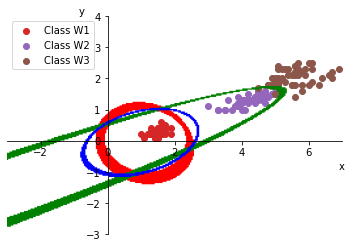

In [6]:
fig, ax = plt.subplots()

get_result(Class1,Class2,Pw,Pw,'r')
get_result(Class3,Class2,Pw,Pw,'g')
get_result(Class3,Class1,Pw,Pw,'b')

plt.scatter([x[0] for x in Class1],[x[1] for x in Class1],label="Class W1")
plt.scatter([x[0] for x in Class2],[x[1] for x in Class2],label="Class W2")
plt.scatter([x[0] for x in Class3],[x[1] for x in Class3],label="Class W3")

plt.legend()
plt.xlim(-3,7)
plt.ylim(-3,4)
plt.show()